In [2]:
import numpy as np
import rdkit as rd

In [3]:
! pip install chembl_webresource_client
! pip install seaborn
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
possible_targets = pd.DataFrame.from_dict(target_query)
possible_targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


Lets choose the one concerning humans

In [5]:
target = possible_targets.target_chembl_id[0]
target

'CHEMBL220'

We will base the activity estimation on the IC50

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963385,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216448,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,274.0
8828,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965328,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,76.2
8829,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965329,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,55.0
8830,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965330,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.18


Then lets do a bit of data cleaning

In [7]:
df_cleaned = df[df.standard_value.notna()]
df_cleaned = df_cleaned[df.canonical_smiles.notna()]
df_cleaned = df_cleaned.drop_duplicates(['canonical_smiles'])

df_cleaned

/var/folders/1w/7yxw4zjn49d6tn1hf1smspbm0000gn/T/ipykernel_84887/1369867220.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963372,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216438,Binding affinity to AChE (unknown origin) asse...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,0.209
8827,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963385,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216448,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,274.0
8828,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965328,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,76.2
8829,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965329,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,55.0


Lets keep only the essential entries

In [8]:
df3 = df_cleaned[['molecule_chembl_id','canonical_smiles','standard_value']]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
8825,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209
8827,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0
8828,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0
8829,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0


Lets chose our descriptors, let begin with Lipinski descriptor and determine which one is active and which one is not 

In [9]:
from rdkit import Chem 
from rdkit.Chem import Descriptors, Lipinski


In [15]:
bioactivity = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity.append(0) #inactive
  elif float(i) <= 1000:
    bioactivity.append(2) #active
  else:
    bioactivity.append(1) #depends

df3['Bioactivity'] = bioactivity
df3.reset_index(drop=True, inplace=True)
df3

/var/folders/1w/7yxw4zjn49d6tn1hf1smspbm0000gn/T/ipykernel_84887/1005883970.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bioactivity'] = bioactivity


,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,2
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,2
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,2
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,2
...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,2
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0,2
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0,0
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0,0


In [17]:
def lipinski(smiles):
    molec = []
    for i in smiles:
        mol = Chem.MolFromSmiles(i) 
        molec.append(mol)

    MW = []
    LogP = []
    NHDonors = []
    NHAcceptors = []

    for n in molec:        
        MW.append(Descriptors.MolWt(n))
        LogP.append(Descriptors.MolLogP(n))
        NHDonors.append(Lipinski.NumHDonors(n))
        NHAcceptors.append(Lipinski.NumHAcceptors(n))
        
    desc_data = pd.DataFrame({
        "Mw": MW,
        "H donors": NHDonors,
        "H acceptors": NHAcceptors,
        "Log P": LogP
    })
    
    return desc_data


df_lipinski = pd.concat([df3, lipinski(df3.canonical_smiles)], axis = 1)
df_lipinski.standard_value

df_lipinski['standard_value'] = pd.to_numeric(df_lipinski['standard_value'], errors='coerce')


# Filter rows with numerical 'standard_value'
df_lipinski = df_lipinski.loc[pd.notna(df_lipinski['standard_value'])]
df_lipinski

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity,Mw,H donors,H acceptors,Log P
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,2,312.325,0,6,2.8032
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,2,376.913,0,5,4.5546
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,0,426.851,0,5,5.3574
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,2,404.845,0,5,4.7069
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,2,346.334,0,6,3.0953
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,2,390.461,2,5,2.8334
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,2,352.478,1,3,5.0610
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,0,287.246,1,4,2.1994
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,0,311.337,1,4,3.1837


Now lets change IC50 to pIC50 (apparently more efficient)

In [18]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])  # Drop the 'standard_value' column

    return x

def pIC50(input):
    if 'standard_value_norm' not in input.columns:
        raise ValueError("Column 'standard_value_norm' does not exist in the DataFrame.")

    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=['standard_value_norm'])  # Drop the 'standard_value' column

    return x

# Apply the pIC50 function to df_lipinski
df_lipinski = norm_value(df_lipinski)
df_lipinski_pIC50 = pIC50(df_lipinski)
df_lipinski_pIC50


/var/folders/1w/7yxw4zjn49d6tn1hf1smspbm0000gn/T/ipykernel_84887/3308344977.py:22: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,Bioactivity,Mw,H donors,H acceptors,Log P,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,2,312.325,0,6,2.8032,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,2,376.913,0,5,4.5546,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,0,426.851,0,5,5.3574,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,2,404.845,0,5,4.7069,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,2,346.334,0,6,3.0953,6.096910
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,2,390.461,2,5,2.8334,9.679854
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,2,352.478,1,3,5.0610,6.562249
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,0,287.246,1,4,2.1994,4.118045
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,0,311.337,1,4,3.1837,4.259637


Now lets evaluate what variable determine the activity
First lets keep only the clearly active and clearly inactive compounds

In [19]:
df_visu = df_lipinski_pIC50[df_lipinski_pIC50['Bioactivity'].isin([0, 2])]
df_visu.reset_index(drop=True, inplace=True)
df_visu

,molecule_chembl_id,canonical_smiles,Bioactivity,Mw,H donors,H acceptors,Log P,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,2,312.325,0,6,2.80320,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,2,376.913,0,5,4.55460,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,0,426.851,0,5,5.35740,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,2,404.845,0,5,4.70690,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,2,346.334,0,6,3.09530,6.096910
...,...,...,...,...,...,...,...,...
4615,CHEMBL5219483,Cc1c(Cl)c(=O)oc2cc(OCCCCSC(=S)N3C(C)CCCC3C)ccc12,2,454.057,0,5,6.19482,6.943095
4616,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,2,390.461,2,5,2.83340,9.679854
4617,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,2,352.478,1,3,5.06100,6.562249
4618,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,0,287.246,1,4,2.19940,4.118045


Text(0, 0.5, 'Frequency')

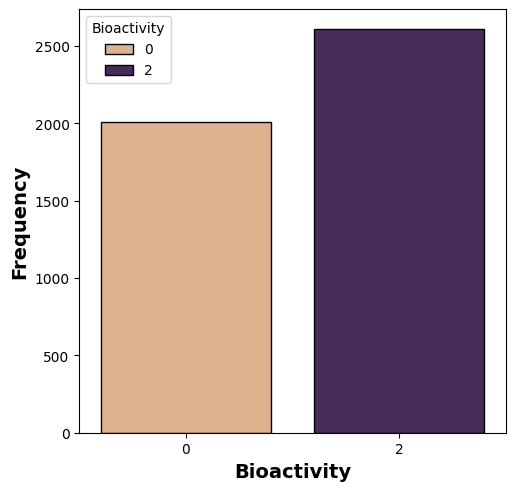

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5.5, 5.5))
#sns.color_palette("flare")
sns.countplot(x='Bioactivity', hue = 'Bioactivity', data=df_visu, edgecolor='black', palette = "flare")

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

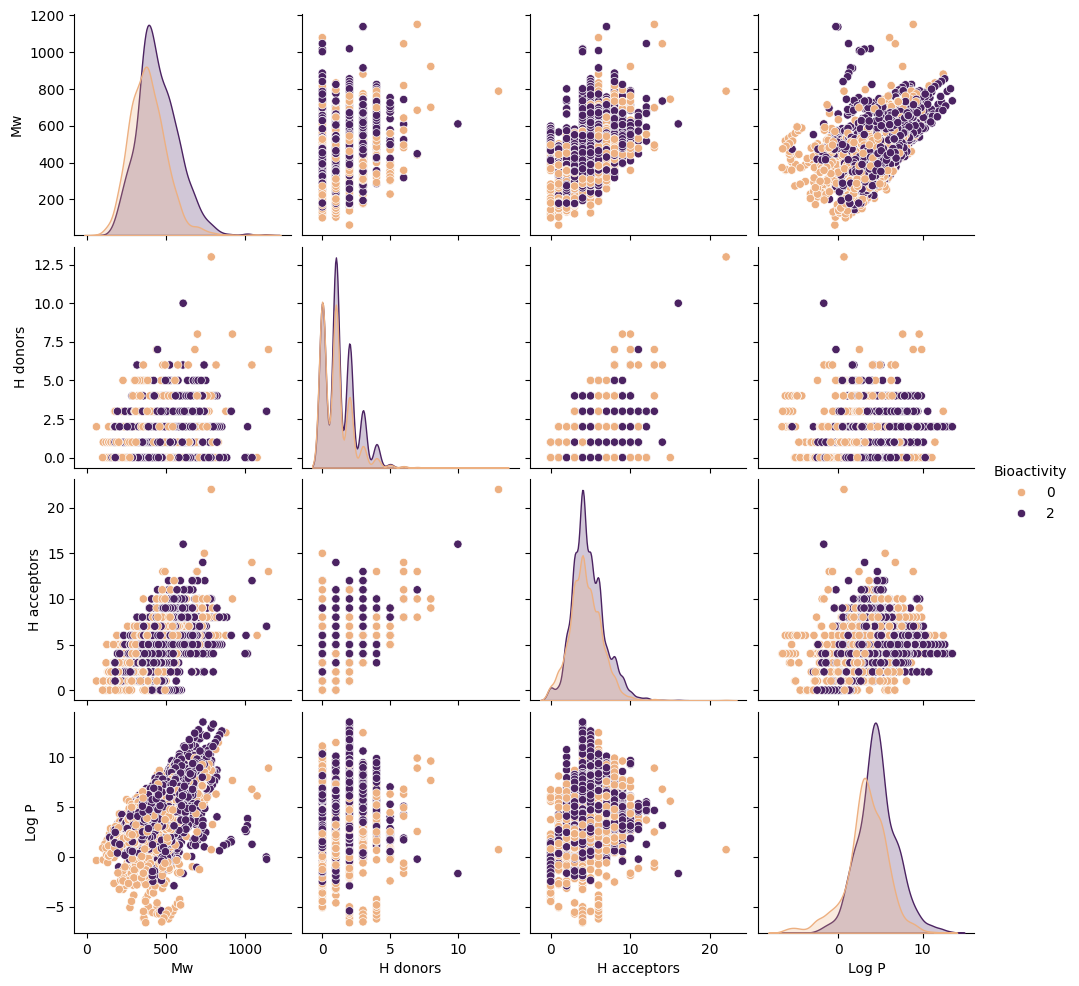

In [21]:
descriptors = ['Mw', 'H donors', 'H acceptors', 'Log P']
sns.pairplot(df_visu[descriptors + ['Bioactivity']], hue="Bioactivity", palette = "flare")

The data are clearly overlapping 

Lets increase the number of descriptor with rdkit:

In [22]:
def descriptors(smiles):
    mols = []

    for i in smiles:
        molec = Chem.MolFromSmiles(i)
        mols.append(molec)
    descrs = [Descriptors.CalcMolDescriptors(mol) for mol in mols]
    df_descr = pd.DataFrame(descrs)

    return df_descr
    

df_descr = descriptors(df_lipinski_pIC50.canonical_smiles)
df_descr

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.818917,11.818917,0.048049,-0.603093,0.699960,312.325,296.197,312.111007,118,0,...,0,0,0,0,0,0,0,0,0,0
1,12.931567,12.931567,0.050268,-0.050268,0.734047,376.913,355.745,376.112460,132,0,...,1,0,0,0,0,0,0,0,0,0
2,12.859892,12.859892,0.135327,-4.406486,0.527034,426.851,412.739,426.052894,146,0,...,1,0,0,0,0,0,0,0,0,0
3,12.714518,12.714518,0.066807,-4.365026,0.695219,404.845,388.717,404.068544,140,0,...,1,0,0,0,0,0,0,0,0,0
4,12.136256,12.136256,0.238990,-4.744549,0.799502,346.334,333.230,346.071131,124,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,12.330480,12.330480,0.008280,-4.062463,0.791052,390.461,368.285,390.124943,144,0,...,0,0,0,0,0,0,0,0,0,0
6153,12.184303,12.184303,0.125522,-0.461220,0.835956,352.478,324.254,352.215078,138,0,...,0,0,0,0,0,0,0,0,0,0
6154,12.786482,12.786482,0.227969,-0.798629,0.801201,287.246,277.166,287.059386,106,0,...,0,0,0,0,0,0,0,0,0,0
6155,11.685062,11.685062,0.289126,-0.762583,0.802917,311.337,294.201,311.115758,118,0,...,0,0,0,0,0,0,0,0,0,0


lets choose the most relevent features:

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    

In [37]:
X = df_descr
X = selection.fit_transform(X)
Y = df_lipinski_pIC50['pIC50']
X.shape #we droped around 80 features

(6157, 129)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train) #not sur about the scaling but i always use to do it to give the same importance to the features

Now lets test out some models
We must always use 'scaler.transform(X_train)' on the 'X_test'
R/: Lets not that as we have a lot of features, the methods using 'distance' as KNN suffer from the high dimension curse